   #                    Data Pre-Processing with Python

# 1.Introduction 

Machine learning algorithms learn from data. It is critical that you feed them the right data for the problem you want to solve. Even if you have good data, you need to make sure that it is in a useful scale, format and even that meaningful features are included.

In this session we will learn how to prepare data for a machine learning algorithm. 

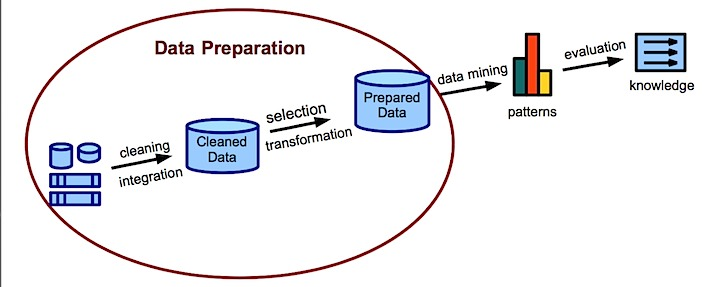

In [61]:
from IPython.display import Image
Image(filename='Images/data_preprocessing.jpeg')

**Problem statement** <br>
Using PIMA Indian Diabetes dataset to predict whether a person has diabetes or not using the medical attributes provided.

** Assumptions **
1. This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
2. Just these attributes are enough to diagnose the ailment

The Dataset is available [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv). The original paper using this dataset can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/). 

**Overview of the session:**<br>
Data Exploration<br>
Working with missing data<br>
Detecting and removing outliers<br>
Correlation analysis<br>
Data Scaling <br>
How to handle imbalanced class data<br>
Dimensionality reduction using PCA<br>
Evaluate Algorithm<br>

# 2.Data Exploration

Lets pull in the data and see what's in it, Here is what we already know about this data 

****Data Overview : ****
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
Several constraints were placed on the selection of these instances from a larger database. In particular, 
all patients here are females at least 21 years old of Pima Indian heritage.

*Columns:*

1.Pregnancies - Number of times pregnant <br>
2.Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
3.BloodPressure - Diastolic blood pressure (mm Hg)<br>
4.SkinThickness - Triceps skin fold thickness (mm)<br>
5.Insulin - 2-Hour serum insulin (mu U/ml)<br>
6.BMI - Body mass index (weight in kg/(height in m)^2)<br>
7.DiabetesPedigreeFunction - based on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient<br>
8.Age - Age (years)<br>
9.Outcome - Class variable (0 or 1)<br> class value 1 is interpreted as "tested positive" for diabetes<br>

Class distribution: <br>
0 : 500 <br>
1 : 268 <br>

**Data characteristics:**

All the attributes are numeric
The data may contain invalid or null values
Total number of cases presented are 786

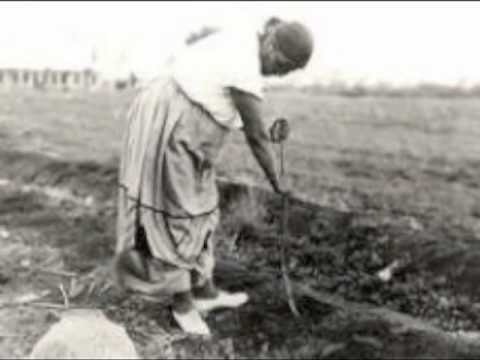

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

## 2.1 Loading CSV data

In [2]:
# Load a CSV file
from csv import reader
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset 

In [3]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset: 
        row[column] = float(row[column].strip()) # removes extra white spaces in string

In [74]:
# Load pima-indians-diabetes dataset
#filename = 'DataSets/pima-indians-diabetes.data.csv'
filename = 'DataSets/pima-indians-diabetes.data.csv'
pima_data = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(pima_data),len(pima_data[0])))
print(pima_data[0])
# convert string columns to float
for i in range(len(pima_data[0])):
    str_column_to_float(pima_data, i)
print(pima_data[0])
print(type(pima_data))

Loaded data file DataSets/pima-indians-diabetes.data.csv with 768 rows and 9 columns
['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
<type 'list'>


In [6]:
#print(pima_data)

**Pandas **

Pandas provides data structures and functionality to quickly manipulate and analyze data. The library’s name derives from **pan**el **da**ta, a common term for multidimensional data sets encountered in statistics and econometrics.[[source]](https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf) The
key to understanding Pandas for machine learning is understanding the Series and DataFrame
data structures.

**1. Series**<br>
A series is a one dimensional array where the rows and columns can be labeled.<br>

**2. DatFrame**<br>
A data frame is a multi-dimensional array where the rows and the columns can be labeled.

**Library Highlights: ** [source](https://pandas.pydata.org/)<br>

-  A fast and efficient DataFrame object for data manipulation with integrated indexing;<br>

-  Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;<br>

-  Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;<br>

-  Flexible reshaping and pivoting of data sets;<br>

-  Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;<br>

-  Columns can be inserted and deleted from data structures for size mutability;<br>

-  Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;<br>

-  High performance merging and joining of data sets;<br>

-  Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;<br>

-  Highly optimized for performance, with critical code paths written in Cython or C.<br>

-  Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.<br>


In [76]:
import pandas as pd
pima_df = pd.read_csv('DataSets/pima-indians-diabetes.data.csv',header = None)
pima_df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
headers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
pima_df = pd.read_csv('DataSets/pima-indians-diabetes.data.csv',names=headers)
#print(pima_df)
print(pima_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [78]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
pima_df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [82]:
pima_df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [83]:
# this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This dataset is known to have missing values.
Specifically, there are missing observations for some columns that are marked as a zero value.

We can see that there are attributes that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Specifically, the following columns have an invalid zero minimum value:

1: Glucose; 2: Blood pressure; 3: Skin thickness; 4: Insulin; 5: BMI

**Note:** We didnt consider Pregnancies here as No. of times pregnant = 0 is valid value

Examining this is important because when some of your data is missing, the data set can lose expressiveness, which can lead to weak or biased analyses. Practically, this means that when you’re missing values for certain features, the chances of your classification or predictions for the data being off only increase.

In [84]:
pima_df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Missing vs sparse data:**
[source](https://stats.stackexchange.com/questions/267322/difference-between-missing-data-and-sparse-data-in-machine-learning-algorithms)

# 3. Working with missing Data

We can get a count of the number of missing values on each of these columns. We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

In [15]:
print((pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0 which is not the usual case, especially blood pressure, since the diastolic blood pressure most likely cannot be 0 for a living person


**1: Plasma glucose concentration:**<br>

The range is normally 3.9 to 7.2 for non-diabetic patients even after fasting [[Source]](https://en.wikipedia.org/wiki/Blood_sugar_level). Given this, the 0s here are not valid.

**2: Blood Pressure: ** <br>

Based on the information provided for [blood pressure in adults on wikipedia](https://en.wikipedia.org/wiki/Blood_pressure#Classification), any diastolic blood pressure under 60 is considered hypotension which needs to be treated immideately as it indicates not enough blood is reaching the person's organs, the person is considered to be in "shock". Browsing more on this subject there are cases where the diastolic bp is read even lower while not exhibiting signs of hypotension but that's mostly rare. the distolic blood pressure can be low in case the person is sleeping too.
**Assuming** these are normal healthy women who are currently not suffering from hypotension or are in the ER currently being treated for hypotension and they are awake at the time of the data collection, the 0 values are clearly invalid.

**3: Triceps skinfold thickness: **<br>

For normal healthy adults the skin fold thinkness is not less than 10mm even for girls [[source]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/)

**4: 2-Hour serum insulin: **<br>

In some rare cases a person can have zero insulin but they almost definitely have diabetes, which doesn't seem to be the case as per the data since 374 cases have insulin value 0 but are classified to not having diabetes

**5: Body mass index: **<br>

Based on WebMD data BMI among adults range from 18.5 to 30.0 or higher. Assuming none of these women are extremely short or extremely underweight the BMI should not be 0 or close to 0 [[Source]](https://www.webmd.com/a-to-z-guides/body-mass-index-bmi-for-adults)

We can see that Glucose ,BloodPressure and BMI have just a few zero values, whereas BloodPressure and SkinThickness show a lot more, nearly half of the rows.

This highlights that different “missing value” strategies may be needed for different attributes, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.


***Replacing missing values***<br>

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.<br>
Values with a NaN value are ignored from operations like sum, count, etc.<br>

We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in.<br>

After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.<br>

In [16]:
# mark zero values as missing or NaN
import numpy as np
pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# count the number of NaN values in each column
print(pima_df.isnull())
print(pima_df.isnull().sum())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False    False          False          False     True  False   
2          False    False          False           True     True  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
5          False    False          False           True     True  False   
6          False    False          False          False    False  False   
7          False    False           True           True     True  False   
8          False    False          False          False    False  False   
9          False    False          False           True     True   True   
10         False    False          False           True     True  False   
11         False    False          False           True     True  False   
12         False    False

**Impute Missing Values**<br>

Imputing refers to using a model to replace missing values.
There are many options we could consider when replacing a missing value, for example:<br>

A constant value that has meaning within the domain, such as 0, distinct from all other values.<br>
A value from another randomly selected record.<br>
A mean, median or mode value for the column.<br>
A value estimated by another predictive model.<br>

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.
For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.
Pandas provides the fillna() function for replacing missing values with a specific value.
For example, we can use fillna() to replace missing values with the mean value for each column, as follows:

In [17]:
# fill missing values with mean column values
pima_df.fillna(pima_df.mean(), inplace=True)
# count the number of NaN values in each column
print(pima_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


** Different Strategies for Handling missing values:**

There are a couple of ways We can handle these invalid data values:

1. Ignore/remove these casses - this may not work in the Skin Thickness and Insulin levels have large number of such invalid data points, removing those would leave us with very little data in an already small dataset. This may work for bmi, glucose and BP invalid data points
2. Put substitute (mean/median etc. ) values - this may not work out in all cases either, e.g. blood pressure, the blood pressure may be correlated to the diabetes therefore putting an average value for BP may provide a wrong signal to the model or reduce its predictive value
3. not using those features for the classification algorthm - this may work, perhaps in the case of skin thickness.


**Series mean.** Replaces missing values with the mean for the entire series.

**Mean of nearby points.** Replaces missing values with the mean of valid surrounding values. The span of nearby points is the number of valid values above and below the missing value used to compute the mean.

**Median of nearby points.** Replaces missing values with the median of valid surrounding values. The span of nearby points is the number of valid values above and below the missing value used to compute the median.

**Linear interpolation.** Replaces missing values using a linear interpolation. The last valid value before the missing value and the first valid value after the missing value are used for the interpolation. If the first or last case in the series has a missing value, the missing value is not replaced.

**Algorithm that supports missing values** There are algorithms that can be made robust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing.There are also algorithms that can use the missing value as a unique and different value when building the predictive model, such as classification and regression trees. [Explore xgboost]


The scikit-learn library provides the Imputer() pre-processing class that can be used to replace missing values.
It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The Imputer class operates directly on the NumPy array instead of the DataFrame.
The example below uses the Imputer class to replace missing values with the mean of each column then prints the number of NaN values in the transformed matrix.

In [18]:
from sklearn.preprocessing import Imputer
# fill missing values with mean column values
values = pima_df.values
print (values)
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
0


# 3. Data Visualization

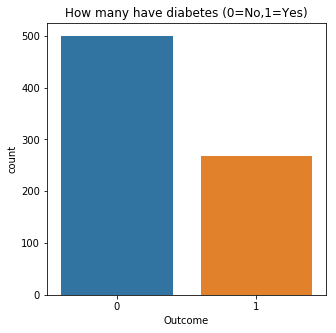

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5)) #figsize=(length, height)
plt.title('How many have diabetes (0=No,1=Yes)')
locs, labels =plt.xticks()
sns.countplot(pima_df['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117e907d0>,
      dtype=object)

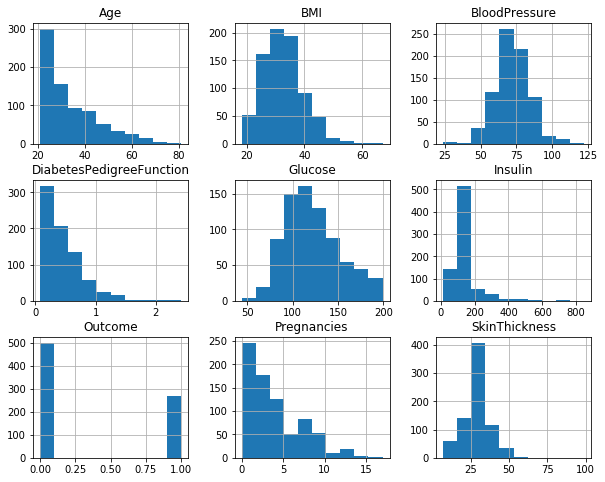

In [20]:
# histogram (Univariate Plots)
# From histogram we can determine whether the distribution is normal-like or not
pima_df.hist(figsize=(10,8))

In [24]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


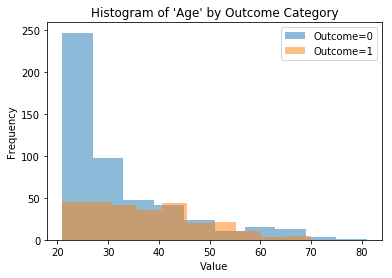

In [25]:
X = pima_df.loc[:,'Pregnancies':'Age']
print(X.head())
y = pima_df['Outcome']
plot_histogram_dv(X['Age'], y)

### Outlier detection - Tukey IQR
- Identifies extreme values in data


- Outliers are defined as:
    - Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
 
 
- Standard deviation from the mean is another common method to detect extreme values
    - But it can be problematic:
        - Assumes normality 
        - Sensitive to very extreme values

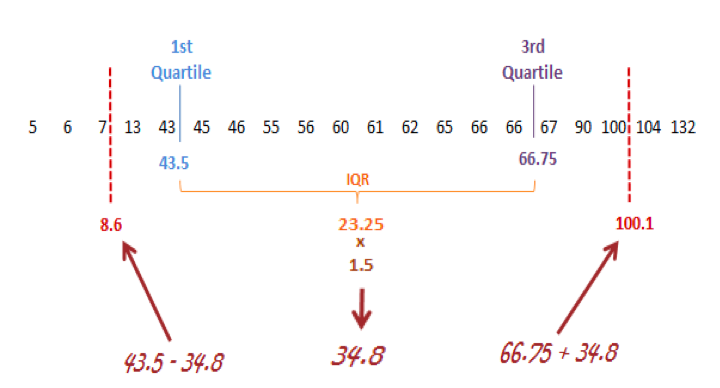

In [22]:
from IPython.display import Image
Image(filename='Images/tukeyiqr.jpg')

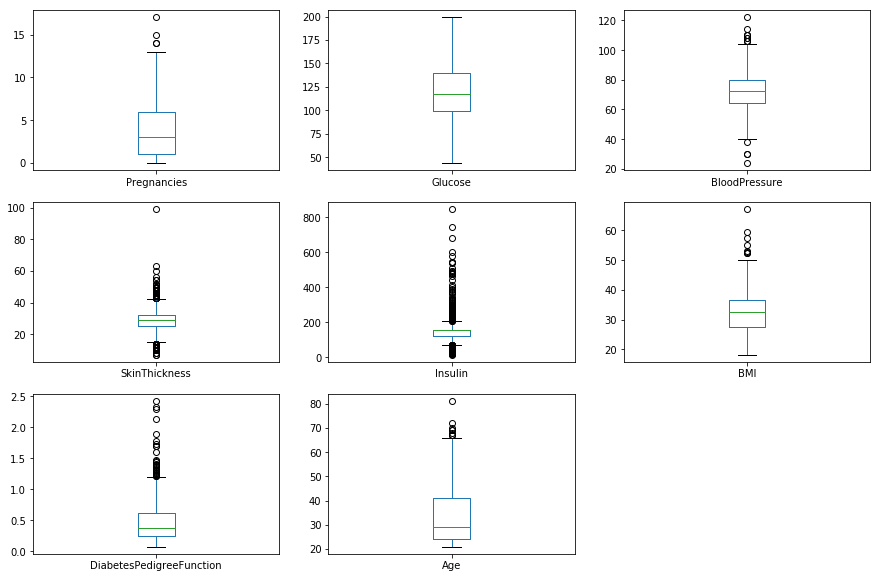

In [26]:
# box and whisker plot (Univariate Plots)
# with this we can determine outliers in dataset
X = pima_df.loc[:,'Pregnancies':'Age']
X.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))
plt.show()

**Why 1.5 times the width of the box for the outliers? Why does that particular value demark the difference between "acceptable" and "unacceptable" values?** <br>
Because, when John Tukey was inventing the box-and-whisker plot in 1977 to display these values, he picked 1.5×IQR as the demarkation line for outliers. This has worked well, so we've continued using that value ever since. If you go further into statistics, you'll find that this measure of reasonableness, for bell-curve-shaped data, means that usually only maybe as much as about one percent of the data will ever be outliers.


**Removing Outliers Using Standard Deviation**<br>
Our approach was to remove the outlier points by eliminating any points that were above (Mean + 2.75*SD) and any points below (Mean - 2.75*SD) before plotting the frequencies.


In [32]:
X = pima_df.loc[:,'Pregnancies':'Age']
outlier_df = X['Age'][((X['Age']-X['Age'].mean()).abs() > 2.75*X['Age'].std())] 
print(outlier_df)
out_indices = outlier_df.index
print(out_indices)

123    69
221    66
363    67
453    72
459    81
489    67
495    66
537    67
552    66
666    70
674    68
684    69
759    66
Name: Age, dtype: int64
Int64Index([123, 221, 363, 453, 459, 489, 495, 537, 552, 666, 674, 684, 759], dtype='int64')


In [34]:
X.loc[out_indices] = np.nan
print(X)
mid = X['Age'].median()
X.loc[out_indices] = mid
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0            6.0    148.0      72.000000       35.00000  155.548223   
1            1.0     85.0      66.000000       29.00000  155.548223   
2            8.0    183.0      64.000000       29.15342  155.548223   
3            1.0     89.0      66.000000       23.00000   94.000000   
4            0.0    137.0      40.000000       35.00000  168.000000   
5            5.0    116.0      74.000000       29.15342  155.548223   
6            3.0     78.0      50.000000       32.00000   88.000000   
7           10.0    115.0      72.405184       29.15342  155.548223   
8            2.0    197.0      70.000000       45.00000  543.000000   
9            8.0    125.0      96.000000       29.15342  155.548223   
10           4.0    110.0      92.000000       29.15342  155.548223   
11          10.0    168.0      74.000000       29.15342  155.548223   
12          10.0    139.0      80.000000       29.15342  155.548223   
13    

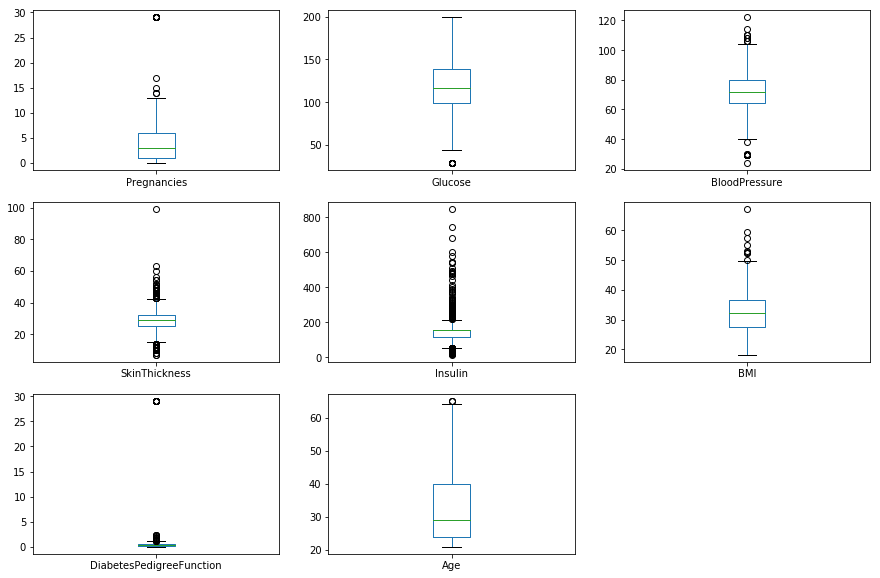

In [35]:
X.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))
plt.show()

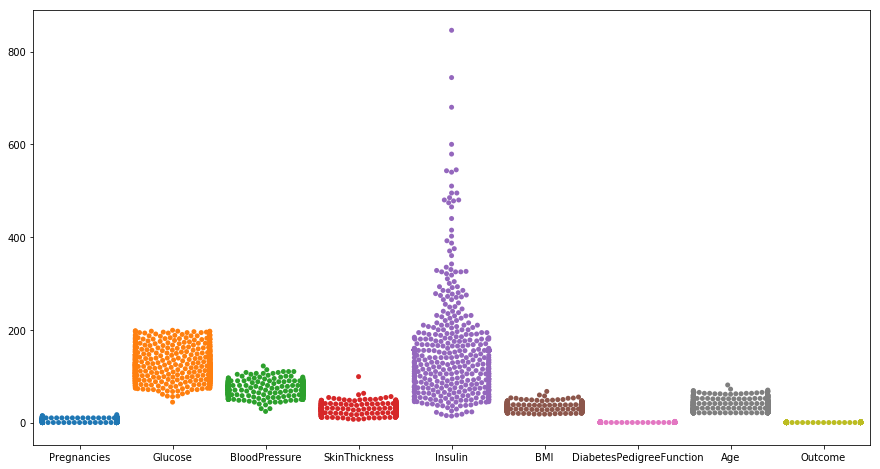

In [36]:
#Plotting all of your data: Bee swarm plots
plt.figure(figsize=(15,8))
_ = sns.swarmplot(data=pima_df)
plt.show()

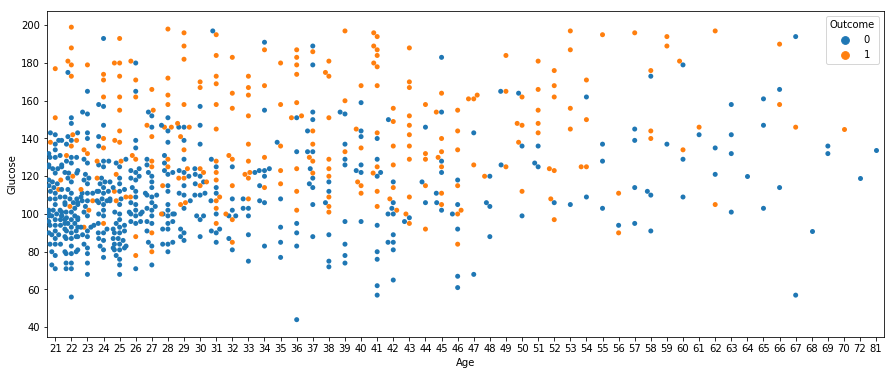

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))  
_ = sns.swarmplot(x='Age',y='Glucose',hue='Outcome',data=pima_df)
plt.show()

In [ ]:
#!pip install plotnine

[reference](https://stats.idre.ucla.edu/r/faq/how-can-i-explore-different-smooths-in-ggplot2/) for exploring different smooths in ggplot2

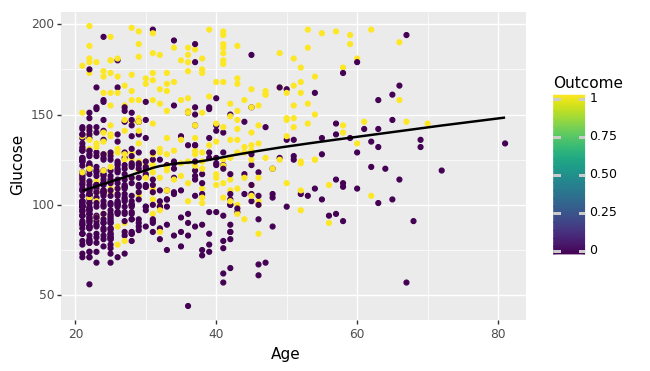

<ggplot: (7547461505)>

In [38]:
import warnings
warnings.filterwarnings("ignore")
from plotnine import *
ggplot(pima_df,aes(x='Age',y='Glucose',colour='Outcome')) +geom_point()+stat_smooth()


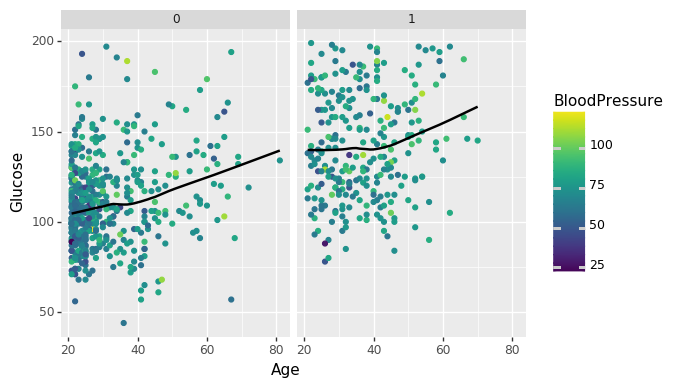

<ggplot: (294288713)>

In [39]:
ggplot(pima_df,aes(x='Age',y='Glucose',colour = 'BloodPressure')) +geom_point()+stat_smooth()+facet_wrap('~Outcome')

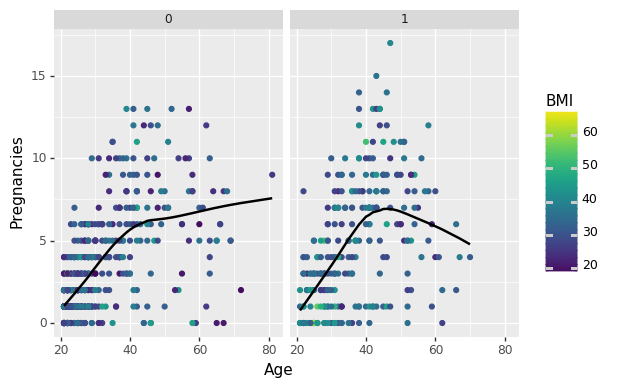

<ggplot: (294281529)>

In [40]:
ggplot(pima_df,aes(x='Age', y ='Pregnancies'))+geom_point(aes(color='BMI'))+facet_wrap('~Outcome')+stat_smooth()

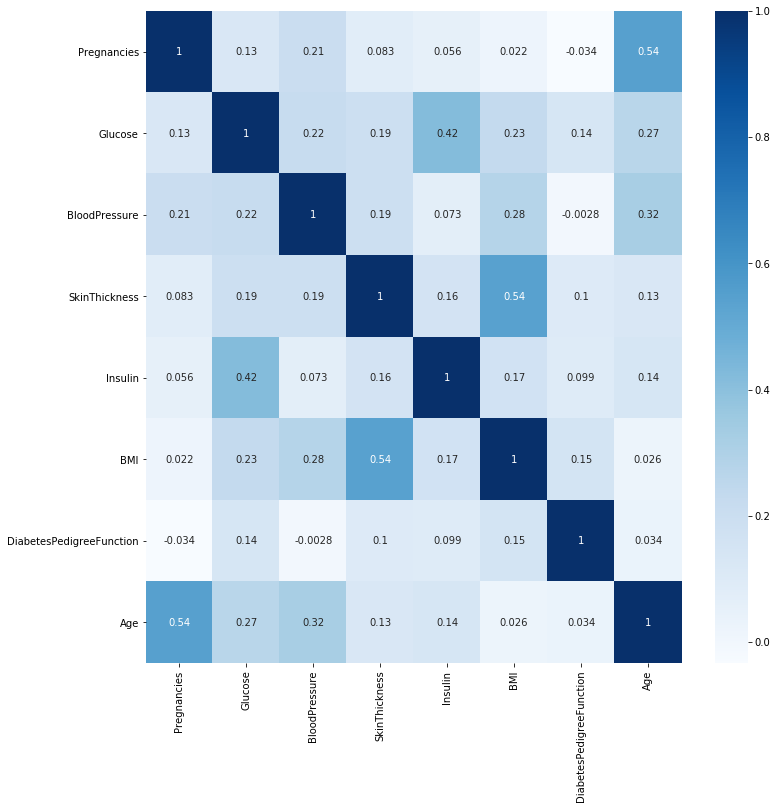

In [41]:
# correlation of each Point
corr = pima_df.loc[:,pima_df.columns!='Outcome'].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="Blues")

**We can observe that there are correlatiom between some columns** <br>
Age is highly correlated with pregnancies<br>
Insulin is correlated with skin Glucose<br>
skin thickness is correlated with BMI

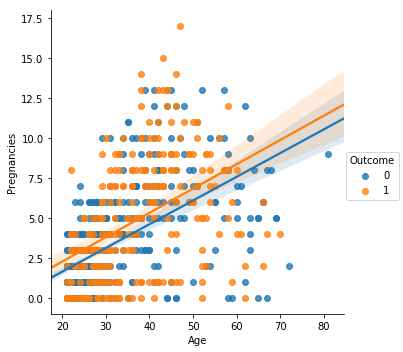

In [42]:
sns.lmplot(x='Age', y = 'Pregnancies', hue = 'Outcome', data = pima_df)

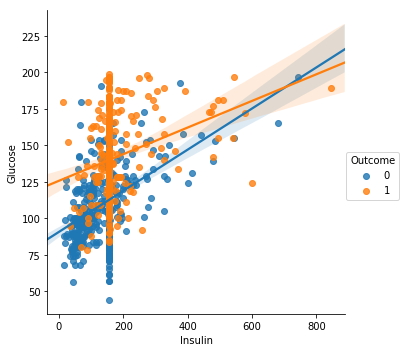

In [43]:
sns.lmplot(x='Insulin', y = 'Glucose', hue = 'Outcome', data = pima_df)

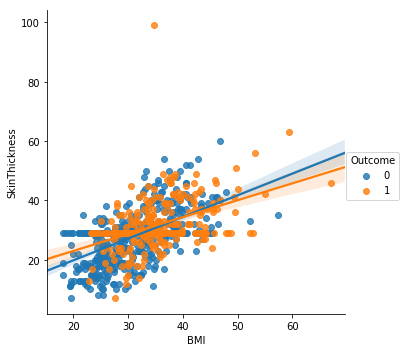

In [44]:
sns.lmplot(x='BMI', y = 'SkinThickness', hue = 'Outcome', data = pima_df)

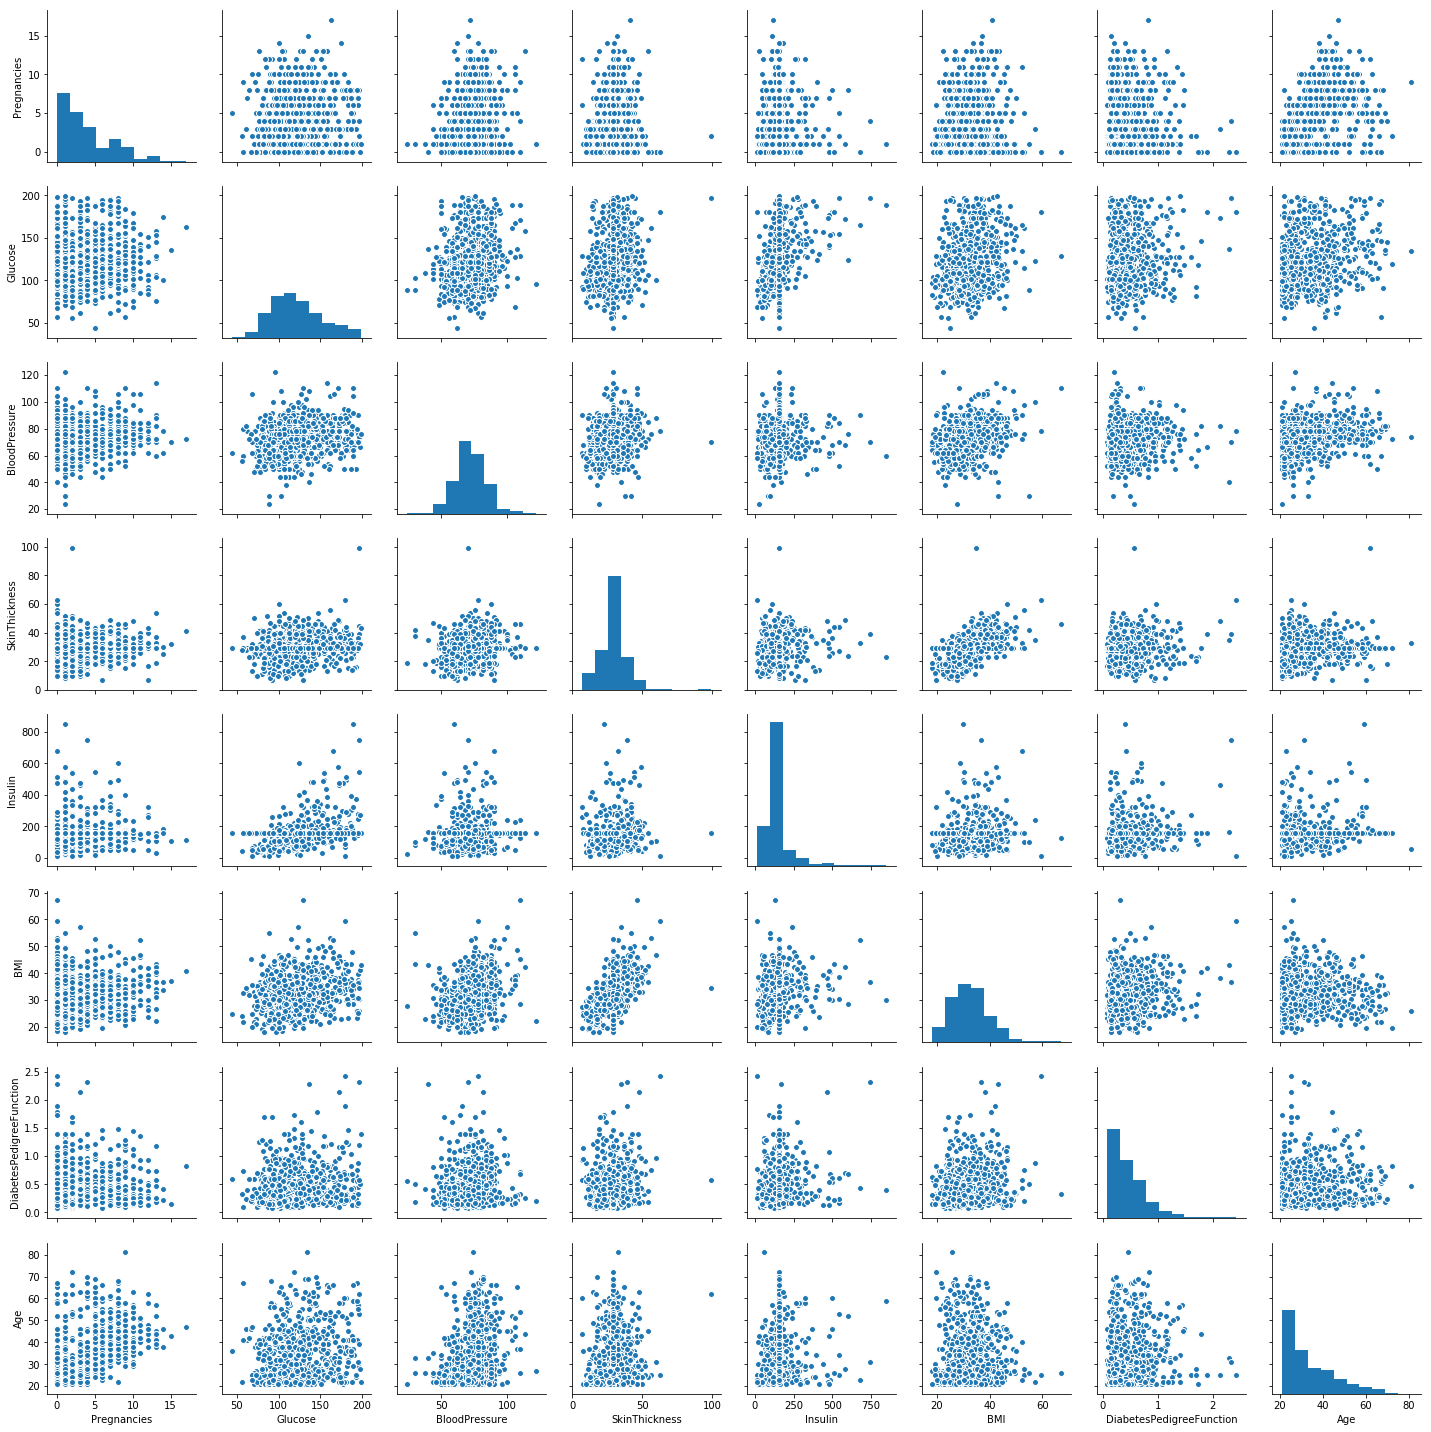

In [45]:
#Visualise pairplot using seaborn which will give plot against each attribute to another attribute
sns.pairplot(pima_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# 4. Data Scaling

Many machine learning algorithms expect the scale of the input and even the output data to be
equivalent. It can help in methods that weight inputs in order to make a prediction, such as
in linear regression and logistic regression. It is practically required in methods that combine
weighted inputs in complex ways such as in artificial neural networks and deep learning.

We will discuss:

**1.Normalise Data**<br>
**2.Standardize Data**<br>
**3.When to Normalise and Standardize**<br>

**1.Normalize Data**<br>
Normalization can refer to different techniques depending on context. Here, we use normalization to refer to rescaling an input variable to the range between 0 and 1. Normalization requires that you know the minimum and maximum values for each attribute.
This can be estimated from training data or specified directly if you have deep knowledge of the problem domain. You can easily estimate the minimum and maximum values for each attribute in a dataset by enumerating through the values.

Once we have estimates of the maximum and minimum allowed values for each column, we
can normalize the raw data to the range 0 and 1. The calculation to normalize a single
value for a column is:<br>
**scaled value** = (value - min)/(max - min)

In [46]:
np.set_printoptions(precision=3)
array = np.array(pima_df.values)
print("==  Generating data sets ==")

print("diabetes_attr: unchanged, original attributes")
diabetes_attr = array[:,0:8]
label = array[:,8] #unchanged across preprocessing?
diabetes_df = pd.DataFrame(diabetes_attr)


==  Generating data sets ==
diabetes_attr: unchanged, original attributes


In [47]:
print("Normalized_attributes: range of 0 to 1")
from sklearn import preprocessing as preproc
scaler = preproc.MinMaxScaler().fit(diabetes_attr)
normalized_attr = scaler.transform(diabetes_attr)
normalized_df = pd.DataFrame(normalized_attr)
print(normalized_df.describe())

Normalized_attributes: range of 0 to 1
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.501205    0.493930    0.240798    0.170130    0.291564   
std      0.198210    0.196361    0.123432    0.095554    0.102189    0.140596   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.359677    0.408163    0.195652    0.129207    0.190184   
50%      0.176471    0.470968    0.491863    0.240798    0.170130    0.290389   
75%      0.352941    0.620968    0.571429    0.271739    0.170130    0.376278   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%    

**2. Standardize Data**

Standardization is a rescaling technique that refers to centering the distribution of the data on
the value 0 and the standard deviation to the value 1. Together, the mean and the standard
deviation can be used to summarize a normal distribution, also called the Gaussian distribution
or bell curve.
It requires that the mean and standard deviation of the values for each column be known
prior to scaling. As with normalizing above, we can estimate these values from training data, or
use domain knowledge to specify their values.

The standard deviation describes the average spread of values from the mean. It can be
calculated as the square root of the sum of the squared difference between each value and the
mean and dividing by the number of values minus 1.

Once mean and standard deviation is calculated we can easily calculate standardized value.The calculation to standardize a single value for a column is: :<br>
**standardized value** = (value - mean)/stdev

In [48]:
print("standardized_attr: mean of 0 and stdev of 1")
#scaler = preproc.StandardScaler().fit(diabetes_attr)
#standardized_attr = scaler.transform(diabetes_attr)
standardized_attr = preproc.scale(diabetes_attr)
standardized_df = pd.DataFrame(standardized_attr)
print(standardized_df.describe())

standardized_attr: mean of 0 and stdev of 1
                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17 -3.301757e-16  6.966722e-16  6.866252e-16 -2.352033e-16   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.554131e+00 -4.004245e+00 -2.521670e+00 -1.665945e+00   
25%   -8.448851e-01 -7.212214e-01 -6.953060e-01 -4.727737e-01 -4.007289e-01   
50%   -2.509521e-01 -1.540881e-01 -1.675912e-02  8.087936e-16 -3.345079e-16   
75%    6.399473e-01  6.103090e-01  6.282695e-01  3.240194e-01 -3.345079e-16   
max    3.906578e+00  2.541850e+00  4.102655e+00  7.950467e+00  8.126238e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   3.090699e-16  2.398978e-16  1.857600e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -2.075119e+00 -1.189553e+00 -1.041549e

**3. When to Normalize and Standardize**<br>

Standardization is a scaling technique that assumes your data conforms to a normal distribution.
If a given data attribute is normal or close to normal, this is probably the scaling method to use.
It is good practice to record the summary statistics used in the standardization process so that
you can apply them when standardizing data in the future that you may want to use with your
model. Normalization is a scaling technique that does not assume any specic distribution.

If your data is not normally distributed, consider normalizing it prior to applying your
machine learning algorithm. It is good practice to record the minimum and maximum values
for each column used in the normalization process, again, in case you need to normalize new
data in the future to be used with your model.

## Handling Imbalanced Class Data

In [49]:
print("=== undersampling majority class by purging ===")

# Separate majority and minority classes
df_majority = pima_df[pima_df['Outcome']==0]
df_minority = pima_df[pima_df['Outcome']==1]

=== undersampling majority class by purging ===


In [50]:
print("df_minority['class'].size", df_minority['Outcome'].size)
from sklearn.utils import resample
# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                          replace=False,    # sample without replacement
                          n_samples=df_minority['Outcome'].size,  # match minority class
                          random_state=7) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

("df_minority['class'].size", 268)


In [51]:
print("undersampled", df_downsampled.groupby('Outcome').size()) 
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)
undersampling_attr = np.array(df_downsampled.values[:,0:8])
undersampling_label = np.array(df_downsampled.values[:,8])

('undersampled', Outcome
0    268
1    268
dtype: int64)


In [52]:
#!pip install imblearn

In [53]:
print("=== oversampling minority class with SMOTE ===")
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7)
x_val = pima_df.values[:,0:8]
y_val = pima_df.values[:,8]
X_res, y_res = sm.fit_sample(x_val, y_val)

features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
oversampled_df = pd.DataFrame(X_res)
oversampled_df.columns = features
oversampled_df = oversampled_df.assign(label = np.asarray(y_res))
oversampled_df = oversampled_df.sample(frac=1).reset_index(drop=True)

oversampling_attr = oversampled_df.values[:,0:8]
oversampling_label = oversampled_df.values[:,8]
print("oversampled_df", oversampled_df.groupby('label').size()) 

=== oversampling minority class with SMOTE ===
('oversampled_df', label
0.0    500
1.0    500
dtype: int64)


In [54]:
print("== treating missing values by purging or imputating ==")
## missing.arff
print("=== Assuming, zero indicates missing values === ")
print("missing values by count")
print((pima_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())
print("=== purging ===")
# make a copy of original data set
dataset_cp = pima_df.copy(deep=True)

dataset_cp[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset_cp[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

== treating missing values by purging or imputating ==
=== Assuming, zero indicates missing values === 
missing values by count
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
=== purging ===


In [55]:
# dataset with missing values
dataset_missing = dataset_cp.dropna()

# summarize the number of rows and columns in the dataset
print(dataset_cp.shape)

missing_attr = np.array(dataset_missing.values[:,0:8])
missing_label = np.array(dataset_missing.values[:,8])

print("=== imputing by replacing missing values with mean column values ===")

dataset_impute = dataset_cp.fillna(dataset_cp.mean())
# count the number of NaN values in each column
print(dataset_impute.isnull().sum())

print("== addressing class imbalance under or over sampling ==")

impute_attr = np.array(dataset_impute.values[:,0:8])

(768, 9)
=== imputing by replacing missing values with mean column values ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
== addressing class imbalance under or over sampling ==


## Dimensionality reduction using PCA
- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data


- Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components 


- Use cases for modeling:
    - One of the most common dimensionality reduction techniques
    - Use if there are too many features or if observation/feature ratio is poor
    - Also, potentially good option if there are a lot of highly correlated variables in your dataset


- Unfortunately, PCA makes models a lot harder to interpret

**PCA as dimensionality reduction**<br>
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.<br>
**Choosing the number of components**<br>
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

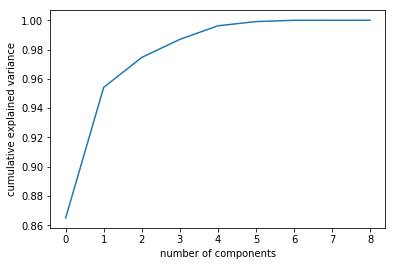

In [73]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(pima_df))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [67]:
pca = PCA(n_components=5)
pca.fit(diabetes_attr)
diabetes_attr_pca = pca.transform(diabetes_attr)
print("original shape:   ", diabetes_attr.shape)
print("transformed shape:", diabetes_attr_pca.shape)


('original shape:   ', (768, 8))
('transformed shape:', (768, 5))


In [68]:
pca.fit(normalized_attr)
normalized_attr_pca  = pca.transform(normalized_attr)

pca.fit(standardized_attr)
standardized_attr_pca = pca.transform(standardized_attr)

pca.fit(impute_attr)
impute_attr_pca = pca.transform(impute_attr)

pca.fit(missing_attr)
missing_attr_pca = pca.transform(missing_attr)

pca.fit(undersampling_attr)
undersampling_attr_pca = pca.transform(undersampling_attr)

pca.fit(oversampling_attr)
oversampling_attr_pca = pca.transform(oversampling_attr)

# Evaluate Algorithms

In [56]:
print(" == Evaluate Some Algorithms == ")
# Split-out validation dataset
print(" == Create a Validation Dataset: Split-out validation dataset == ")

# Test options and evaluation metric
print(" == Test Harness: Test options and evaluation metric == ")
seed = 7
scoring = 'accuracy'

 == Evaluate Some Algorithms == 
 == Create a Validation Dataset: Split-out validation dataset == 
 == Test Harness: Test options and evaluation metric == 


== Build Models: build and evaluate models, Spot Check Algorithms ==
eval metric: accuracy
= diabetes_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.765636 (0.047532) False nan
LDA: 0.766951 (0.052975) False 0.820491
KNN: 0.713534 (0.064980) True 0.012597
CART: 0.687474 (0.063816) True 0.002141
NB: 0.747386 (0.043583) False 0.203854
RF: 0.744737 (0.064272) False 0.184573
SVM: 0.651025 (0.072141) True 0.000537
 == Select Best Model, Compare Algorithms == 


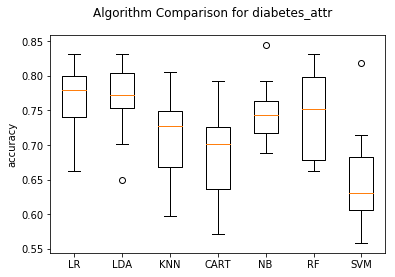

= normalized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.765619 (0.046566) False nan
LDA: 0.766951 (0.052975) False 0.828238
KNN: 0.748701 (0.062006) False 0.235048
CART: 0.700496 (0.048400) True 0.001043
NB: 0.747386 (0.043583) False 0.132240
RF: 0.746036 (0.058189) False 0.061152
SVM: 0.770813 (0.052488) False 0.309233
 == Select Best Model, Compare Algorithms == 


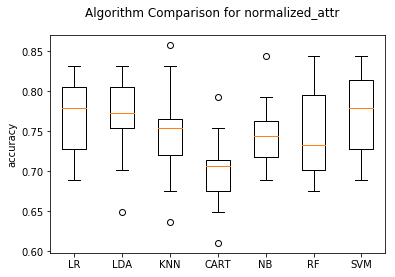

= standardized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.770813 (0.051248) False nan
LDA: 0.766951 (0.052975) False 0.526999
KNN: 0.738278 (0.039157) True 0.030019
CART: 0.687440 (0.063132) True 0.001104
NB: 0.747386 (0.043583) False 0.061474
RF: 0.757707 (0.060612) False 0.356660
SVM: 0.753913 (0.044789) True 0.022590
 == Select Best Model, Compare Algorithms == 


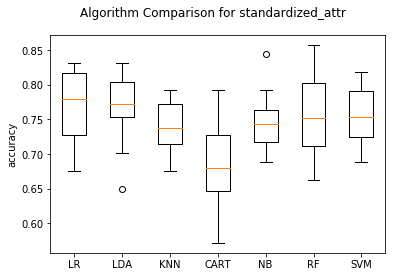

= impute_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.764320 (0.048484) False nan
LDA: 0.766951 (0.052975) False 0.675096
KNN: 0.713534 (0.064980) True 0.014497
CART: 0.696617 (0.055419) True 0.000589
NB: 0.747386 (0.043583) False 0.243960
RF: 0.764234 (0.057085) False 0.996000
SVM: 0.651025 (0.072141) True 0.000669
 == Select Best Model, Compare Algorithms == 


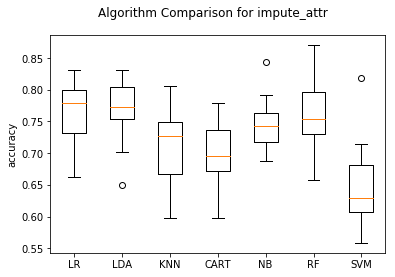

= missing_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.764337 (0.047320) False nan
LDA: 0.766951 (0.052975) False 0.640480
KNN: 0.713534 (0.064980) True 0.014492
CART: 0.691353 (0.063152) True 0.002221
NB: 0.747386 (0.043583) False 0.220344
RF: 0.734330 (0.062398) True 0.037339
SVM: 0.651025 (0.072141) True 0.000570
 == Select Best Model, Compare Algorithms == 


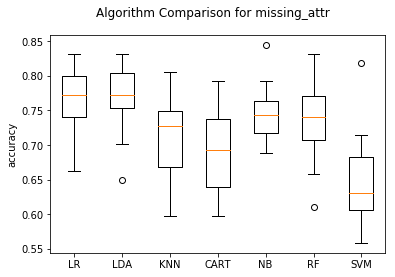

= undersampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.749895 (0.053692) False nan
LDA: 0.751747 (0.071419) False 0.897521
KNN: 0.694165 (0.071292) True 0.009508
CART: 0.663941 (0.081059) True 0.016613
NB: 0.710936 (0.081741) False 0.058574
RF: 0.720335 (0.059445) False 0.210477
SVM: 0.458910 (0.072346) True 0.000001
 == Select Best Model, Compare Algorithms == 


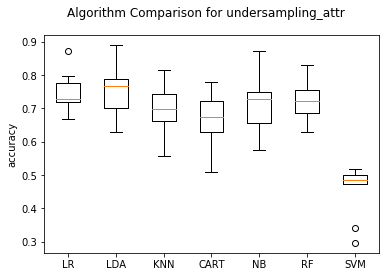

= oversampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.755000 (0.051039) False nan
LDA: 0.749000 (0.045486) False 0.111373
KNN: 0.768000 (0.027129) False 0.481468
CART: 0.762000 (0.028213) False 0.677050
NB: 0.713000 (0.046054) True 0.001323
RF: 0.814000 (0.045869) True 0.002612
SVM: 0.713000 (0.043829) False 0.090454
 == Select Best Model, Compare Algorithms == 


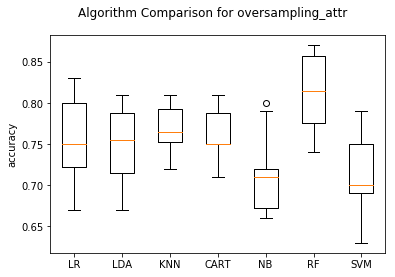

In [93]:
# Spot Check Algorithms without feature reduction
# algo eval imports
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# significance tests
import scipy.stats as stats
import math

print("== Build Models: build and evaluate models, Spot Check Algorithms ==")
datasets = []
datasets.append(('diabetes_attr', diabetes_attr, label))
datasets.append(('normalized_attr', normalized_attr, label))
datasets.append(('standardized_attr', standardized_attr, label))
datasets.append(('impute_attr', impute_attr, label))
datasets.append(('missing_attr', missing_attr, missing_label))
datasets.append(('undersampling_attr', undersampling_attr, undersampling_label))
datasets.append(('oversampling_attr', oversampling_attr, oversampling_label))

models = []
models.append(('LR', LogisticRegression())) # based on imbalanced datasets and default parameters
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

print("eval metric: " + scoring)
for dataname, attributes, target in datasets:
    # evaluate each model in turn
    results = []
    names = []
    print("= " + dataname + " = ")
    print("algorithm,mean,std,signficance,p-val")
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, attributes, target, cv=kfold, scoring=scoring)
        results.append(cv_results)
        #print("cv_results")
        #print(cv_results)
        #print(results[0])
        names.append(name)

        t, prob = stats.ttest_rel(a= cv_results,b= results[0])
        #print("LR vs ", name, t,prob)
        # Below 0.05, significant. Over 0.05, not significant. 
        # http://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
        statistically_different = (prob < 0.05)

        msg = "%s: %f (%f) %s %f" % (name, cv_results.mean(), cv_results.std(), statistically_different, prob)
        print(msg)

    # Compare Algorithms
    print(" == Select Best Model, Compare Algorithms == ")
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison for ' + dataname)
    ax = fig.add_subplot(111) 
    plt.boxplot(results)
    plt.ylabel(scoring)
    ax.set_xticklabels(names)
    plt.show()

== Build Models: build and evaluate models, Spot Check Algorithms ==
eval metric: accuracy
= diabetes_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.760492 (0.049736) False nan
LDA: 0.753947 (0.051575) False 0.297575
KNN: 0.717413 (0.066119) True 0.023485
CART: 0.670540 (0.066640) True 0.001672
NB: 0.747454 (0.048375) False 0.195421
RF: 0.713551 (0.053480) True 0.009030
SVM: 0.651025 (0.072141) True 0.000815
 == Select Best Model, Compare Algorithms == 


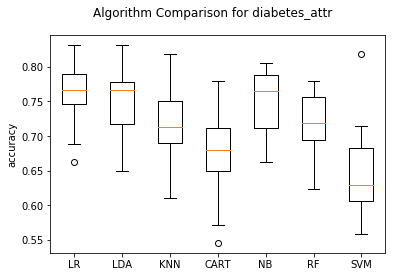

= normalized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.763004 (0.052644) False nan
LDA: 0.759091 (0.049164) False 0.432778
KNN: 0.720010 (0.064269) True 0.001669
CART: 0.654802 (0.061094) True 0.000207
NB: 0.742208 (0.045907) False 0.140785
RF: 0.740858 (0.063580) False 0.123441
SVM: 0.772095 (0.054777) True 0.009535
 == Select Best Model, Compare Algorithms == 


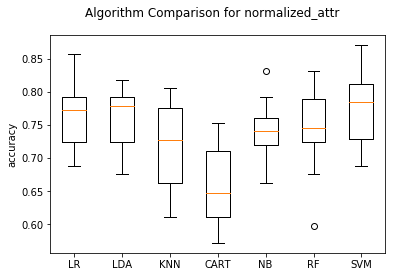

= standardized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.748701 (0.033960) False nan
LDA: 0.742208 (0.031646) False 0.272912
KNN: 0.718763 (0.051160) True 0.033641
CART: 0.704323 (0.043981) True 0.007545
NB: 0.721343 (0.035560) True 0.035025
RF: 0.716131 (0.047187) True 0.008683
SVM: 0.733083 (0.046566) False 0.179971
 == Select Best Model, Compare Algorithms == 


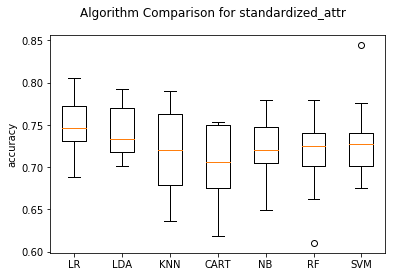

= impute_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.765636 (0.047532) False nan
LDA: 0.766951 (0.052975) False 0.820491
KNN: 0.713534 (0.064980) True 0.012597
CART: 0.687389 (0.049055) True 0.000286
NB: 0.747386 (0.043583) False 0.203854
RF: 0.751299 (0.053382) False 0.169036
SVM: 0.651025 (0.072141) True 0.000537
 == Select Best Model, Compare Algorithms == 


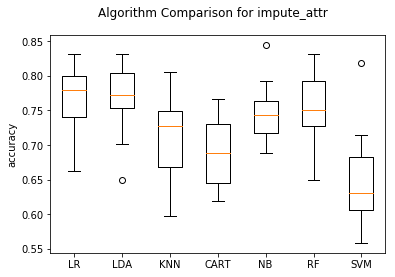

= missing_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.760492 (0.049736) False nan
LDA: 0.753947 (0.051575) False 0.297575
KNN: 0.717413 (0.066119) True 0.023485
CART: 0.663995 (0.055143) True 0.000938
NB: 0.747454 (0.048375) False 0.195421
RF: 0.731716 (0.058688) False 0.065855
SVM: 0.651025 (0.072141) True 0.000815
 == Select Best Model, Compare Algorithms == 


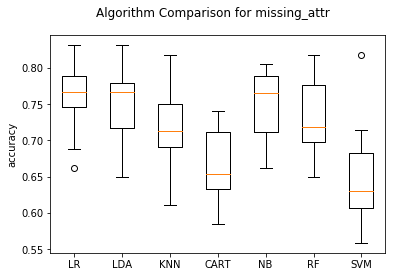

= undersampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.716387 (0.058158) False nan
LDA: 0.716282 (0.060502) False 0.983147
KNN: 0.690426 (0.067903) False 0.208882
CART: 0.673620 (0.065603) False 0.115618
NB: 0.701398 (0.058597) False 0.206335
RF: 0.686513 (0.074474) False 0.179856
SVM: 0.451468 (0.063015) True 0.000002
 == Select Best Model, Compare Algorithms == 


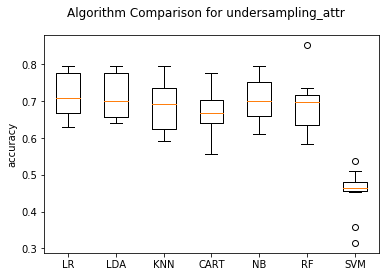

= oversampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.711000 (0.038588) False nan
LDA: 0.717000 (0.040262) False 0.051003
KNN: 0.762000 (0.023580) True 0.000407
CART: 0.742000 (0.049960) False 0.135066
NB: 0.708000 (0.050951) False 0.802536
RF: 0.767000 (0.024920) True 0.001139
SVM: 0.684000 (0.052192) False 0.261975
 == Select Best Model, Compare Algorithms == 


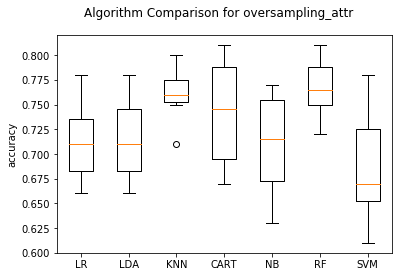

In [92]:
# Spot Check Algorithms after feature reduction with pca
# algo eval imports
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# significance tests
import scipy.stats as stats
import math

print("== Build Models: build and evaluate models, Spot Check Algorithms ==")
datasets = []
datasets.append(('diabetes_attr', diabetes_attr_pca, label))
datasets.append(('normalized_attr', normalized_attr_pca, label))
datasets.append(('standardized_attr', standardized_attr_pca, label))
datasets.append(('impute_attr', impute_attr, label))
datasets.append(('missing_attr', missing_attr_pca, missing_label))
datasets.append(('undersampling_attr', undersampling_attr_pca, undersampling_label))
datasets.append(('oversampling_attr', oversampling_attr_pca, oversampling_label))

models = []
models.append(('LR', LogisticRegression())) # based on imbalanced datasets and default parameters
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

print("eval metric: " + scoring)
for dataname, attributes, target in datasets:
    # evaluate each model in turn
    results = []
    names = []
    print("= " + dataname + " = ")
    print("algorithm,mean,std,signficance,p-val")
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, attributes, target, cv=kfold, scoring=scoring)
        results.append(cv_results)
        #print("cv_results")
        #print(cv_results)
        names.append(name)

        t, prob = stats.ttest_rel(a= cv_results,b= results[0])
        #print("LR vs ", name, t,prob)
        # Below 0.05, significant. Over 0.05, not significant. 
        statistically_different = (prob < 0.05)

        msg = "%s: %f (%f) %s %f" % (name, cv_results.mean(), cv_results.std(), statistically_different, prob)
        print(msg)

    # Compare Algorithms
    print(" == Select Best Model, Compare Algorithms == ")
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison for ' + dataname)
    ax = fig.add_subplot(111) 
    plt.boxplot(results)
    plt.ylabel(scoring)
    ax.set_xticklabels(names)
    plt.show()